# <span style="color:#4d4dff"> Projeto Titanic: Uma análise dos dados de passageiros </span>

Dados extraídos de https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv
<p>Maiores informações em https://www.kaggle.com/c/titanic/data</p>

In [342]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_csv('titanic-data-6.csv')

In [343]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<span style="color:#4d4dff">Primeiro vamos verificar os dados na tabela.</span>


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<span style="color:#4d4dff"> Verificamos que os tipos de dados estão apropriadosem quse todas as colunas (com exceção para 'Survived' que trataremos mais adiante) mas existem valores faltantes. Para "Age" aplicaremos à todos valores faltantes a média das idades. </span>
                

In [345]:
mean = df["Age"].mean()
df["Age"].fillna(mean, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [346]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<span style="color:#4d4dff">Observamos agora de forma mais precisa que existem muitos valores faltantes para 'Cabin' e apenas 2 para 'Embarked'. Para a nossa análise, 'Cabin' será removido da tabela (qualquer análise que levasse a cabine em consideração seria muito imprecisa)  e verificaremos  a contagem dos valores para 'Embarked' e tomarmos uma decisão. </span>

In [347]:
df = df.drop('Cabin', axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [348]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<span style="color:#4d4dff">Como 'Southampton' é o valor mais frequente (bem mais frequente do que o segundo lugar) aplicaremos  o valor de 'S' para as duas linhas faltantes por ser o valor mais provável.</span>

In [349]:
df["Embarked"].fillna('S', inplace = True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<span style="color:#4d4dff">Nenhum valor faltante</span>

In [350]:
sum(df.duplicated()) 

0

<span style="color:#4d4dff">Também não existem valores duplicados.</span>

<span style="color:#4d4dff">Para efeitos de melhor vizualização, mudaremos o tipo da coluna 'Survived' para String e seus valores para 'Yes' e 'No'  ao invés de '0' e '1'.</span>

In [351]:
df['Survived'] = df.Survived.astype(str)
df['Survived'] = df['Survived'].map({'0': 'No', '1':'Yes'})
#não rodar de novo, ou as linhas serão substituidas por Nan
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [352]:
df1 = df.groupby(['Sex', 'Survived'], as_index=False).count()
df1.head()

,Sex,Survived,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
0,female,No,81,81,81,81,81,81,81,81,81
1,female,Yes,233,233,233,233,233,233,233,233,233
2,male,No,468,468,468,468,468,468,468,468,468
3,male,Yes,109,109,109,109,109,109,109,109,109


<span style="color:#4d4dff">Questão: Primeiro queremos saber quantas mulheres e homens morreram. </span>
<span style="color:#4d4dff">Primeiro pegaremos qualquer uma das outras colunas para criarmos uma coluna 'Total' com o valor total de indivíduos daquele grupo. A partir do dataframa df1 podemos utilzar qualquer uma das outras colunas. No caso usaremos a coluna 'PassengerId'. </span>

In [353]:

df1['Total'] = df1['PassengerId']
df1 = df1.filter(['Sex', 'Survived', 'Total'])
df1

,Sex,Survived,Total
0,female,No,81
1,female,Yes,233
2,male,No,468
3,male,Yes,109


<span style="color:#4d4dff">Criaremos um grafico sobre a proporção de cada sexo nos dados do navio. Em seguida apresentaremos um gráfico sobre a mortandade em cada sexo.</span>

Total Male: 577
Total Female: 314


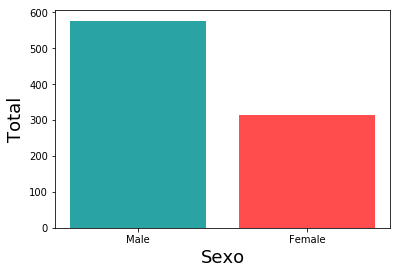

In [354]:
x = ['Male', 'Female']

men = df1.loc[df1['Sex'] == 'male'].sum()['Total']
women = df1.loc[df1['Sex'] == 'female'].sum()['Total']

y = [men, women]
colors = ['#29a3a3', '#ff4d4d']


def graph(x_label, y_label):
    """
    Gera um gráfico de barras. Os valores para 'x' e 'y'devem ser pré estabelecidos e guardados em variaveis com o mesmo nome.

    Parameters:
    x_label = rótulo para o eixo x
    y_label = rótulo para o eixo y

    Returns:
    um gráfico de barras.
    """
        
    plt.bar(x,y,color = colors)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label, fontsize = 18)
    
 
  
graph('Sexo', 'Total')

def print_values():
    """
    Imprime o valor total de cada barra
    Parameters:
     ---

    Returns:
    Texto com os valores de cada barra
    """
    for i,j in zip(x,y):
        print('Total ' + i + ': ' + str(j))
        
print_values()
  


Total fem/no: 81
Total fem/yes: 233
Total male/no: 468
Total male/yes: 109


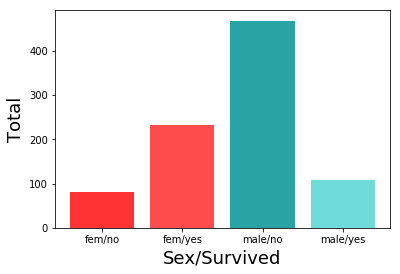

In [355]:

x = ['fem/no', 'fem/yes', 'male/no', 'male/yes']
y = df1['Total']
colors = '#ff3333', '#ff4d4d', '#29a3a3', '#70dbdb'


graph('Sex/Survived', 'Total')

print_values()



<span style="color:#4d4dff">Observamos que temos 577 homens e 314 mulheres registrados na tabela. E que mais homens morreram do que mulheres.</span>

<span style="color:#4d4dff">Questão: Queremos saber agora a proporção entre mortandade e classe do passageiro.</span>

In [356]:
df2 = df.groupby(['Pclass', 'Survived'], as_index=False).count()
df2['Total'] = df2['PassengerId']
df2 = df2.filter(['Pclass', 'Survived','Total'])
df2

,Pclass,Survived,Total
0,1,No,80
1,1,Yes,136
2,2,No,97
3,2,Yes,87
4,3,No,372
5,3,Yes,119


Total 1: 216
Total 2: 184
Total 3: 491


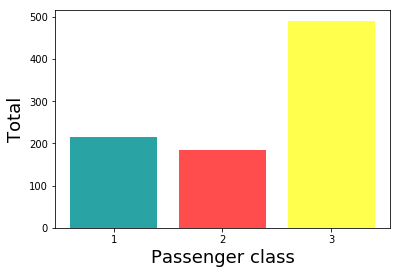

In [357]:
x = ['1' , '2' , '3']

one = df2.loc[df2['Pclass'] == 1].sum()['Total']
two = df2.loc[df2['Pclass'] == 2].sum()['Total']
three = df2.loc[df2['Pclass'] == 3].sum()['Total']

y = [one,two,three]
colors = ['#29a3a3', '#ff4d4d','#ffff4d']

graph('Passenger class', 'Total')

print_values()


<span style="color:#4d4dff">Obtivemos um gráfico sobre a quantidade de passageiro por classe no navio. </span>
    
<span style="color:#4d4dff">Questão: Queremos agora avaliar a mortalidade por classe.</span>

In [358]:
#Concatenamos as colunas de classe e sobrevivencia em uma só coluna para formarmos 6 grupos.
df2['Class/Survived'] = df2['Pclass'].astype(str) +'-'+df2['Survived']
df2 = df2.filter(['Class/Survived', 'Total'])
df2

,Class/Survived,Total
0,1-No,80
1,1-Yes,136
2,2-No,97
3,2-Yes,87
4,3-No,372
5,3-Yes,119


Total 1-No: 80
Total 1-Yes: 136
Total 2-No: 97
Total 2-Yes: 87
Total 3-No: 372
Total 3-Yes: 119


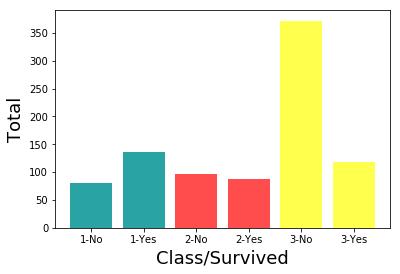

In [359]:
x = df2['Class/Survived'].unique()
y = df2['Total'].unique()
colors = ['#29a3a3','#29a3a3', '#ff4d4d','#ff4d4d','#ffff4d','#ffff4d']

#chamamos a função que riará o gráfico
graph('Class/Survived', 'Total')

print_values()

<span style="color:#4d4dff">Observamos que o indice de mortalidade na terceira classe é o mais alto. E que mesmo sendo o grupo predominante no navio, com larga vantagem para os outro dois, mesmo assim seu indice de sobrevivência foi baixo se comparado às outras classes. Observamos também que a primeira classe teve mais sobreviventes do que mortos.</span>

<span style="color:#4d4dff"> Questão: Queremos visualizar de onde vinham os passageiros e qual origem teve a maior mortalidade.</span>

<span style="color:#4d4dff"> Primeiramente queremos vizualizar o total de passageiros por local de embarque.</span>

In [360]:
df3 = df.groupby(['Embarked'], as_index=False).count()
df3['Total'] = df3['PassengerId']
df3 = df3.filter(['Embarked', 'Total'])
df3

,Embarked,Total
0,C,168
1,Q,77
2,S,646


Total C: 168
Total Q: 77
Total S: 646


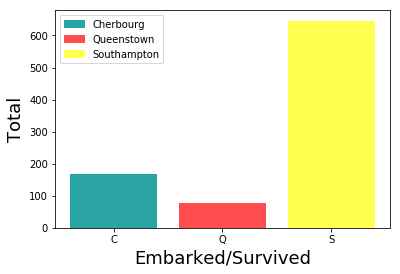

In [361]:
x = df3['Embarked'].unique()
y = df3['Total'].unique()
colors = ['#29a3a3','#ff4d4d','#ffff4d']

#chamamos a função que criará o gráfico
graph('Embarked/Survived', 'Total')

print_values()
#legendas por cor conforme https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
azul = mpatches.Patch(color='#29a3a3', label='Cherbourg')
verm = mpatches.Patch(color='#ff4d4d', label='Queenstown')
amar = mpatches.Patch(color='#ffff4d', label='Southampton')
plt.legend(handles=[azul,verm,amar])




<span style="color:#4d4dff">Agora queremos um gráfico com a mortalidade para cada local de embarque.</span>

In [362]:
#Criamos uma tabela com uma coluna que indica a sobrevivecia por cada local de embarque, e outra coluna com o total de cada grupo.
df3 = df.groupby(['Embarked', 'Survived'], as_index=False).count()
df3['Total'] = df3['PassengerId']
df3['Embarked/Survived'] = df3['Embarked'] +'-'+df3['Survived']
df3 = df3.filter(['Embarked/Survived', 'Total'])
df3


,Embarked/Survived,Total
0,C-No,75
1,C-Yes,93
2,Q-No,47
3,Q-Yes,30
4,S-No,427
5,S-Yes,219


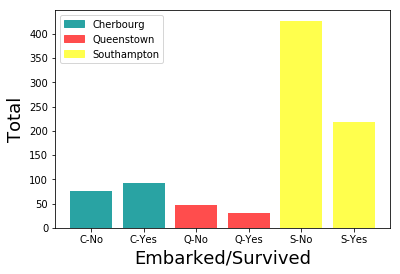

In [314]:
x = df3['Embarked/Survived'].unique()
y = df3['Total'].unique()
colors = ['#29a3a3','#29a3a3', '#ff4d4d','#ff4d4d','#ffff4d','#ffff4d']


#chamamos a função que criará o gráfico
graph('Embarked/Survived', 'Total')


#legendas por cor conforme https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
azul = mpatches.Patch(color='#29a3a3', label='Cherbourg')
verm = mpatches.Patch(color='#ff4d4d', label='Queenstown')
amar = mpatches.Patch(color='#ffff4d', label='Southampton')
plt.legend(handles=[azul,verm,amar])

print_values()


<span style="color:#4d4dff">Podemos observar que a sobrevivência acompanha o que é esperado a partir da observaçãp feita no gráfico anterior. Percebemos também que o gráfico de sobrevivencia por local de embarque é bastante semelhante ao gráfico de sobrevivência por classe.</span>